 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Prepare-the-data" data-toc-modified-id="Prepare-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare the data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Load" data-toc-modified-id="Load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Transform-the-data-into-monthly-time-series" data-toc-modified-id="Transform-the-data-into-monthly-time-series-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Transform the data into monthly time series</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Aggregated-time-serie" data-toc-modified-id="Aggregated-time-serie-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Aggregated time serie</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#By-SalOrg-Material" data-toc-modified-id="By-SalOrg-Material-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>By SalOrg-Material</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Simpler-is-better" data-toc-modified-id="Simpler-is-better-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simpler is better</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Feature-engineering" data-toc-modified-id="Feature-engineering-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Training-of-a-Random-Forest" data-toc-modified-id="Training-of-a-Random-Forest-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training of a Random Forest</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Optimize-the-mse" data-toc-modified-id="Optimize-the-mse-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Optimize the mse</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Optimize-the-mae" data-toc-modified-id="Optimize-the-mae-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Optimize the mae</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#MAE-performances" data-toc-modified-id="MAE-performances-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MAE performances</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Optimize-the-number-of-last-months-for-the-median" data-toc-modified-id="Optimize-the-number-of-last-months-for-the-median-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Optimize the number of last months for the median</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Assessment-of-the-seasonality-and-optimization-of-the-model" data-toc-modified-id="Assessment-of-the-seasonality-and-optimization-of-the-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assessment of the seasonality and optimization of the model</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Compute-the-ratios" data-toc-modified-id="Compute-the-ratios-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Compute the ratios</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Results-for-march-2017" data-toc-modified-id="Results-for-march-2017-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Results for march 2017</a></span></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Generalization-for-the-other-months-?" data-toc-modified-id="Generalization-for-the-other-months-?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generalization for the other months ?</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/yohann/Presentation.ipynb#Final-submission" data-toc-modified-id="Final-submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final submission</a></span></li></ul></div>

In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import time

import gc

In [4]:
pd.set_option('display.max_columns', 500)

# Prepare the data

## Load

In [5]:
df = pd.read_csv("../data/demand_anonymized_20170802.csv", sep = ";", decimal=".")

In [6]:
test = pd.read_csv("../data/eval_correct.csv")

In [7]:
df.head()

,ID,First_MAD,SalOrg,DC,Ship_To,ordre,Plant,Material,ItemCat,OrderQty,LT,LogABC,MOQ,ROP,SafetyStk,PL,MktABC,SubFct,Gross_Weight,Length,Width,Height,Volume,Gamma,Manufacturer,Business,Month,CBO_CBO_Qty_Shortage,Age_ZN_ZI_years,DP_FAMILY_CODE,PRODUCT_STATUS,ORIGINAL_SUPPLIER,SUBRANGE,Comp_reference_number,Name_Of_Competitor,COMP_PRICE_MIN,COMP_PRICE_AVG,COMP_PRICE_MAX,PRICE,NEAREST_COMP_PRICE_MIN,NEAREST_COMP_PRICE_MAX
0,2724174,2014-09-12,yqSu,TUiR,MsHvUF,ggT8Bq,vP6T,iR1zr2,lvOi,1,28.0,Nc4e,72.0,0.0,21.0,NmYB,9rfJ,PjXe,0.006299,0.643863,2.148148,0.693069,0.000480,syni,1nVy21,32af,2014-09,NaN,NaN,QIzS,TiQl,X6qzbY,qmsY,1.0,1.0,136.800,136.800000,136.80,152.95,136.80,136.80
1,2325939,2016-02-12,yqSu,csdY,BA5kLC,AIZGVy,vP6T,mD2b7j,lvOi,10,35.0,hfuf,300.0,0.0,87.0,c2Z5,vegq,PjXe,0.000693,0.281690,0.296296,3.613861,0.000151,syni,1nVy21,otZd,2016-02,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1836800,2013-05-24,U12J,TUiR,MBZhLQ,8Z4g83,Cisr,AjywTn,lvOi,2,28.0,Nc4e,12.0,0.0,69.0,ss6l,vegq,PjXe,0.038961,1.529175,2.518519,0.653465,0.001261,MYF4,o86vTw,32af,2013-05,NaN,2.493151,W2Bc,TiQl,SXlc2j,bUkB,3.0,2.0,411.939,677.394667,830.28,908.60,830.28,830.28
3,2820654,2012-07-12,yqSu,csdY,9Co4iE,RNuiEu,vP6T,DPiXfc,lvOi,10,35.0,Nc4e,450.0,0.0,148.0,c2Z5,vegq,PjXe,0.000682,0.241449,4.814815,0.247525,0.000144,syni,1nVy21,otZd,2012-07,NaN,NaN,zAA4,TiQl,Rmt5iw,5cy5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5579286,2012-02-29,OQfZ,TUiR,88lPvN,KPTgL7,9O7Z,tOsuQV,lvOi,6,28.0,Nc4e,460.0,0.0,500.0,c2Z5,9rfJ,PjXe,0.000693,0.261569,4.481481,0.173267,0.000100,9AXw,OEScPd,otZd,2012-02,NaN,NaN,yZYX,TiQl,ikezPZ,1ftA,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,ID,OrderQty,LT,MOQ,ROP,SafetyStk,Gross_Weight,Length,Width,Height,Volume,CBO_CBO_Qty_Shortage,Age_ZN_ZI_years,Comp_reference_number,Name_Of_Competitor,COMP_PRICE_MIN,COMP_PRICE_AVG,COMP_PRICE_MAX,PRICE,NEAREST_COMP_PRICE_MIN,NEAREST_COMP_PRICE_MAX
count,5.595701e+06,5.595701e+06,5.595700e+06,5.595700e+06,5.595700e+06,5.595700e+06,5.595701e+06,5.595701e+06,5.595701e+06,5.595701e+06,5.595701e+06,2.724594e+06,1.853763e+06,5.258191e+06,5.258191e+06,2.121384e+06,2.121384e+06,2.121384e+06,2.388870e+06,2.121384e+06,2.121384e+06
mean,3.646187e+06,7.461934e+00,3.370401e+01,1.403106e+02,3.734635e+00,2.413586e+02,8.011129e-03,9.517893e-01,2.100058e+00,7.691710e-01,7.546465e-04,5.868896e-01,3.458818e+00,5.777209e-01,5.057990e-01,2.035065e+02,2.119079e+02,2.201040e+02,2.152748e+02,2.118683e+02,2.119443e+02
std,2.106117e+06,4.343582e+01,2.006159e+01,2.398007e+02,3.561514e+01,6.007280e+02,1.985787e-02,7.908497e-01,1.693008e+00,8.834940e-01,4.860782e-03,1.590793e+01,1.998652e+00,8.493506e-01,6.783801e-01,1.963082e+02,2.054457e+02,2.170663e+02,2.007371e+02,2.079232e+02,2.081222e+02
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.570000e+00,3.500000e+00,3.500000e+00
25%,1.822350e+06,1.000000e+00,2.800000e+01,7.000000e+00,0.000000e+00,8.000000e+00,6.277056e-04,2.816901e-01,7.037037e-01,2.772277e-01,9.982992e-05,0.000000e+00,1.871233e+00,0.000000e+00,0.000000e+00,4.800000e+01,4.840000e+01,4.920000e+01,5.625000e+01,4.900000e+01,4.900000e+01
50%,3.647149e+06,1.000000e+00,3.500000e+01,2.700000e+01,0.000000e+00,4.400000e+01,4.186147e-03,7.444668e-01,1.962963e+00,4.455446e-01,4.053095e-04,0.000000e+00,3.273973e+00,0.000000e+00,0.000000e+00,1.662300e+02,1.732500e+02,1.792000e+02,1.728900e+02,1.716260e+02,1.716260e+02
75%,5.474079e+06,4.000000e+00,3.500000e+01,1.750000e+02,0.000000e+00,1.960000e+02,1.106061e-02,1.287726e+00,2.518519e+00,8.415842e-01,6.335872e-04,0.000000e+00,4.846575e+00,1.000000e+00,1.000000e+00,2.697500e+02,2.811120e+02,2.918585e+02,2.839000e+02,2.772000e+02,2.772000e+02
max,7.292398e+06,6.560000e+03,3.650000e+02,4.800000e+03,2.800000e+03,8.000000e+03,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,5.525000e+03,9.495890e+00,9.000000e+00,4.000000e+00,2.014110e+03,2.014110e+03,2.014110e+03,2.035000e+03,2.014110e+03,2.014110e+03


In [9]:
df['First_MAD'] = pd.to_datetime(df['First_MAD'])
df["year"] = df["First_MAD"].dt.year
df["month"] = df["First_MAD"].dt.month

## Transform the data into monthly time series

### Aggregated time serie

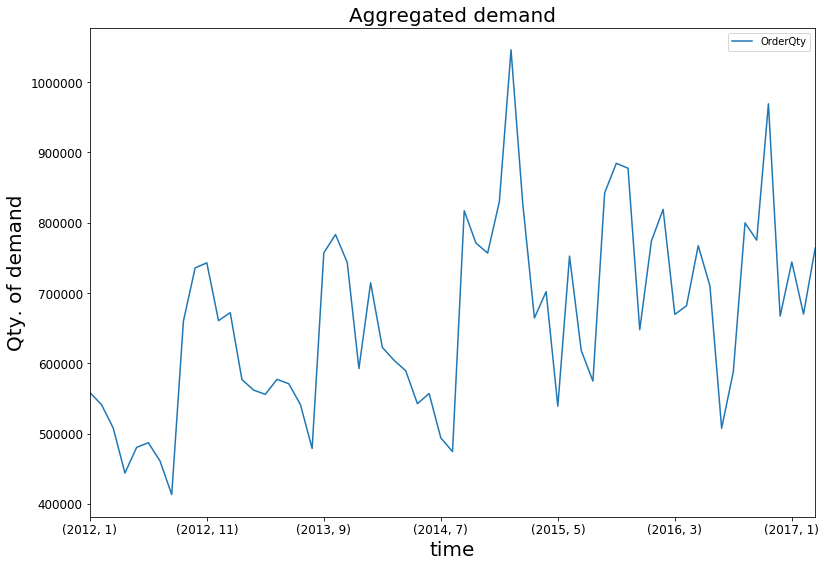

In [56]:
figure, ax = plt.subplots()
df[['year', 'month', 'OrderQty']].groupby(['year', 'month']).sum().plot(y = "OrderQty", 
                                                                        #title = , 
                                                                        ax = ax, 
                                                                        figsize = (13,9))

ax.set_title(label="Aggregated demand", fontdict={"size":20})
ax.set_ylabel(ylabel='Qty. of demand', fontdict={"size":20})
ax.set_xlabel(xlabel='time', fontdict={"size":20})

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


In [58]:
#figure.savefig("../yohann/image/aggregated_demand.png")

### By SalOrg-Material

In [10]:
gp_data = df[['Material','SalOrg','OrderQty','First_MAD', 'year', 'month']].groupby(['SalOrg', 'Material', 'year', 'month'])

In [11]:
df2 = gp_data.sum().reset_index()

In [12]:
df2.head()

,SalOrg,Material,year,month,OrderQty
0,97LK,00IYcj,2012,5,2
1,97LK,00IYcj,2012,6,13
2,97LK,00IYcj,2012,7,1
3,97LK,00IYcj,2012,9,30
4,97LK,00IYcj,2012,11,1


We use the `pivot_table` function to represent the data in terms of time series :

In [13]:
df3 = df2.pivot_table(index=['SalOrg', 'Material'], columns=["year", "month"]).fillna(0)

In [14]:
df3.head()

OrderQty                                                      \
year                2012                                                       
month                 1    2    3    4    5     6    7    8     9    10   11   
SalOrg Material                                                                
97LK   00IYcj        0.0  0.0  0.0  0.0  2.0  13.0  1.0  0.0  30.0  0.0  1.0   
       00MFcK        0.0  1.0  1.0  1.0  0.0   0.0  4.0  0.0   0.0  0.0  0.0   
       00Ok8y        5.0  2.0  2.0  7.0  0.0   2.0  4.0  0.0   0.0  0.0  0.0   
       00W03x        0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   0.0  0.0  0.0   
       00lqzT        2.0  2.0  1.0  0.0  0.0   0.0  1.0  0.0   1.0  0.0  0.0   

                                                                            \
year                  2013                                                   
month             12    1     2    3     4    5    6    7    8    9     10   
SalOrg Material                                                              
97LK   00IYcj    4.0  16.0  15.0  7.0  15.0  4.0  7.0  3.0  2.0  3.0  10.0   
       00MFcK    0.0   0.0   0.0  0.0   0.0  0.0  0.0  1.0  1.0  0.0   1.0   
       00Ok8y    0.0   2.0   0.0  2.0   4.0  4.0  3.0  1.0  0.0  0.0   1.0   
       00W03x    0.0   0.0   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   0.0   
       00lqzT    0.0   1.0   1.0  0.0   1.0  0.0  0.0  0.0  0.0  1.0   1.0   

                                                                              \
year                         2014                                              
month              11    12    1    2    3    4     5     6    7    8     9    
SalOrg Material                                                                
97LK   00IYcj    25.0  14.0  18.0  7.0  7.0  6.0  10.0  19.0  5.0  4.0  11.0   
       00MFcK     1.0   0.0   1.0  1.0  1.0  1.0   0.0   0.0  0.0  0.0   0.0   
       00Ok8y     0.0   0.0   0.0  0.0  0.0  0.0   2.0   2.0  2.0  0.0   0.0   
       00W03x     0.0   0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   
       00lqzT     3.0   2.0   0.0  1.0  1.0  1.0   6.0   2.0  2.0  1.0   0.0   

                                                                           \
year                            2015                                        
month              10   11   12   1    2    3    4     5     6    7    8    
SalOrg Material                                                             
97LK   00IYcj    11.0  1.0  3.0  8.0  0.0  6.0  7.0  12.0  11.0  3.0  5.0   
       00MFcK     0.0  1.0  1.0  0.0  0.0  1.0  0.0   1.0   0.0  0.0  0.0   
       00Ok8y     0.0  0.0  0.0  0.0  0.0  2.0  0.0   0.0   0.0  5.0  0.0   
       00W03x     0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0   
       00lqzT     1.0  3.0  0.0  1.0  0.0  0.0  0.0   1.0   1.0  3.0  2.0   

                                                                              \
year                                 2016                                      
month              9    10   11   12   1    2    3    4    5    6    7    8    
SalOrg Material                                                                
97LK   00IYcj    10.0  3.0  7.0  3.0  4.0  4.0  9.0  0.0  1.0  9.0  6.0  6.0   
       00MFcK     0.0  0.0  0.0  0.0  0.0  2.0  2.0  0.0  0.0  0.0  0.0  0.0   
       00Ok8y     0.0  1.0  2.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  3.0  0.0   
       00W03x     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
       00lqzT     1.0  2.0  1.0  3.0  2.0  2.0  3.0  1.0  2.0  2.0  0.0  0.0   

                                                      
year                                 2017             
month             9    10    11   12   1     2    3   
SalOrg Material                                       
97LK   00IYcj    6.0  0.0  10.0  9.0  8.0  13.0  1.0  
       00MFcK    0.0  0.0   1.0  0.0  0.0   0.0  0.0  
       00Ok8y    0.0  0.0   0.0  0.0  1.0   0.0  0.0  
       00W03x    0.0  0.0   0.0  0.0  4.0   0.0  0.0  
       00lqzT   

In [15]:
df3.columns = list(range(63))

In [16]:
df3 = df3.reset_index()

In [17]:
df3.head(10)

,SalOrg,Material,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,97LK,00IYcj,0.0,0.0,0.0,0.0,2.0,13.0,1.0,0.0,30.0,0.0,1.0,4.0,16.0,15.0,7.0,15.0,4.0,7.0,3.0,2.0,3.0,10.0,25.0,14.0,18.0,7.0,7.0,6.0,10.0,19.0,5.0,4.0,11.0,11.0,1.0,3.0,8.0,0.0,6.0,7.0,12.0,11.0,3.0,5.0,10.0,3.0,7.0,3.0,4.0,4.0,9.0,0.0,1.0,9.0,6.0,6.0,6.0,0.0,10.0,9.0,8.0,13.0,1.0
1,97LK,00MFcK,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,97LK,00Ok8y,5.0,2.0,2.0,7.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,4.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,97LK,00W03x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
4,97LK,00lqzT,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,6.0,2.0,2.0,1.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,4.0,1.0,6.0,3.0,1.0
5,97LK,00mt9e,3.0,2.0,1.0,1.0,2.0,6.0,3.0,6.0,5.0,0.0,11.0,8.0,6.0,10.0,2.0,3.0,2.0,0.0,15.0,2.0,2.0,2.0,1.0,3.0,1.0,6.0,6.0,7.0,0.0,4.0,3.0,0.0,3.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,4.0,0.0,2.0,6.0,0.0,1.0,0.0
6,97LK,02QhQT,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,97LK,02jRc8,0.0,1.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8,97LK,0355Np,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,10.0,3.0,0.0,1.0,0.0,2.0,7.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0
9,97LK,03GYN7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


`df3` dataset contains the time serie historic for each pair of SalOrg & Material (38676 pairs in total).

Here are the plots of the 10 first time series of the dataset :

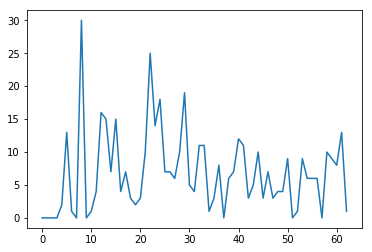

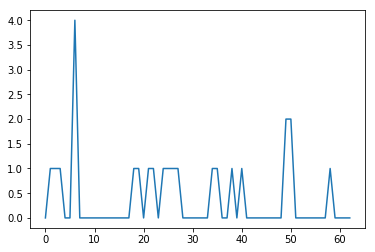

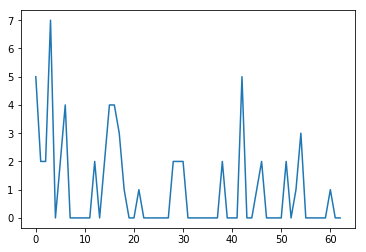

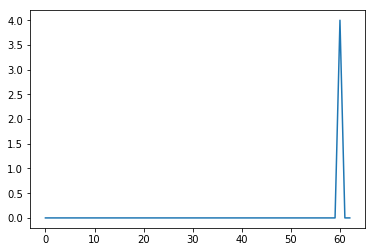

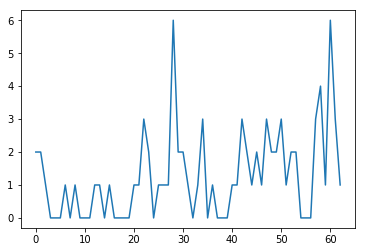

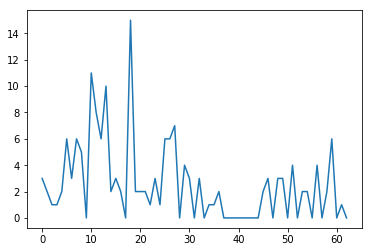

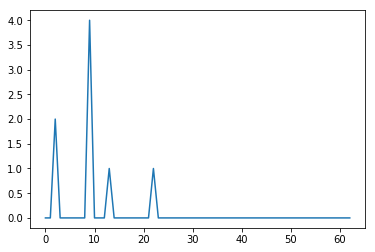

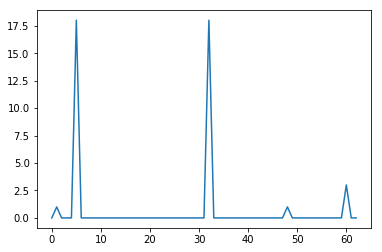

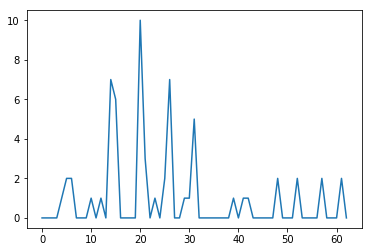

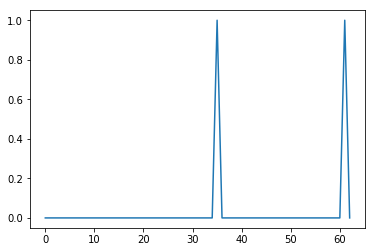

In [23]:
for i in range(10):
    plt.plot(df3.iloc[i,2:].values)
    plt.show()

In [ ]:
# df3.to_csv("../data/time_series_by_SalOrg_Material.csv", index=False)

#  Simpler is better

## Feature engineering

The following `make_feature` function takes a dataset of time series, like `df3`, and build many features per time serie :
* mean/median/std over the last `nb_last_month`
* last months quantity of demand
* number of months since the firts/last demand
* mean/median/std over the months between first & last demand
* mean/median/std since the first demand

In [19]:
def make_feature(data, nb_last_month):
    # statistiques sur les mois précédents
    data2 = data.copy()

    
    for i in nb_last_month:
        data2["last_months_mean_" + str(i)] = data.iloc[:,(data.shape[1]-i):(data.shape[1])].mean(axis = 1)
        data2["last_months_std_" + str(i)] = data.iloc[:,(data.shape[1]-i):(data.shape[1])].std(axis = 1)
        data2["last_months_median_" + str(i)] = data.iloc[:,(data.shape[1]-i):(data.shape[1])].median(axis = 1)

    for j in range(12):
        data2["last_month_" + str(j+1)] = data.iloc[:,(data.shape[1]-(j+1))]
    
    
    n_month_end = list()
    n_month_start = list()
    mean_since_start = list()
    median_since_start = list()
    median_runing_period = list()
    
    for i in range(data.shape[0]):
#        if i % 1000 == 0:
#            print(i)
        if (data.iloc[i, :].sum() == 0):
            n_month_start_one, n_month_end_one = -1, -1
        else :
            n_month_start_one = np.min(np.where(np.array(data.iloc[i, :]) != 0))
            n_month_end_one = np.max(np.where(np.array(data.iloc[i, :]) != 0))
        
        mean_since_start.append(data.iloc[i, n_month_start_one:].mean())
        median_since_start.append(data.iloc[i, n_month_start_one:].median())
        n_month_start.append(n_month_start_one)
        n_month_end.append(n_month_end_one)
        median_runing_period.append(data.iloc[i, range(n_month_start_one, n_month_end_one + 1)].median())
    
    data2["n_month_start"] = n_month_start
    data2["mean_since_start"] = mean_since_start
    data2["median_since_start"] = median_since_start
    data2["n_month_end"] = n_month_end
    data2["median_runing_period"] = median_runing_period
    
    
    for i in range(len(nb_last_month)):
        data2["last_months_median_" + str(nb_last_month[i]) + "_modif"] = \
        np.where( (62 - data2["n_month_start"]) < (nb_last_month[i]-1),
                 data2["median_since_start"].values,
                 data2["last_months_median_" + str(nb_last_month[i])].values
                )
        
    
    #    data2["last_months_median_" + str(nb_last_month[i]) + "_modif_ratio"] = \
    #    data2["last_months_median_" + str(nb_last_month[i]) + "_modif"] * ratio[i]
    
    data2.drop(list(range(0,data.shape[1])), axis=1, inplace=True)
    
    data2["n_month_since_start"] = data.shape[1] - data2["n_month_start"]
    data2["n_month_since_end"] = data.shape[1] - data2["n_month_end"]
    data2.drop(["n_month_start", "n_month_end"], axis=1, inplace=True)
    
    return data2

As a first step, we build `X_train` based on the months 0 to 60, `y_train` based on the months 61, `X_test_local` based on the months 0 to 61, and `y_test_local` based on the month 62.

This means we compute our validation scores based on the data for march 2017.

In [176]:
X_train = make_feature(data= df3[list(range(0,61))], nb_last_month=[3,6,9,12,15])

In [177]:
X_train.head()

,last_months_mean_3,last_months_std_3,last_months_median_3,last_months_mean_6,last_months_std_6,last_months_median_6,last_months_mean_9,last_months_std_9,last_months_median_9,last_months_mean_12,last_months_std_12,last_months_median_12,last_months_mean_15,last_months_std_15,last_months_median_15,last_month_1,last_month_2,last_month_3,last_month_4,last_month_5,last_month_6,last_month_7,last_month_8,last_month_9,last_month_10,last_month_11,last_month_12,mean_since_start,median_since_start,median_runing_period,last_months_median_3_modif,last_months_median_6_modif,last_months_median_9_modif,last_months_median_12_modif,last_months_median_15_modif,n_month_since_start,n_month_since_end
0,9.000000,1.000000,9.0,6.500000,3.563706,7.0,6.111111,3.515837,6.0,5.666667,3.651484,6.0,5.466667,3.356586,6.0,8.0,9.0,10.0,0.0,6.0,6.0,6.0,9.0,1.0,0.0,9.0,4.0,7.385965,6.0,6.0,9.0,7.0,6.0,6.0,6.0,57,1
1,0.333333,0.577350,0.0,0.166667,0.408248,0.0,0.111111,0.333333,0.0,0.416667,0.792961,0.0,0.333333,0.723747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,3
2,0.333333,0.577350,0.0,0.166667,0.408248,0.0,0.555556,1.013794,0.0,0.583333,0.996205,0.0,0.600000,0.985611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0,1.016393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,1
3,1.333333,2.309401,0.0,0.666667,1.632993,0.0,0.444444,1.333333,0.0,0.333333,1.154701,0.0,0.266667,1.032796,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,4.0,4.0,0.0,4.0,4.0,4.0,4.0,1,1
4,3.666667,2.516611,4.0,2.333333,2.422120,2.0,2.000000,2.061553,2.0,2.000000,1.809068,2.0,2.000000,1.647509,2.0,6.0,1.0,4.0,3.0,0.0,0.0,0.0,2.0,2.0,1.0,3.0,2.0,1.245902,1.0,1.0,4.0,2.0,2.0,2.0,2.0,61,1


In [178]:
y_train = df3[61].values
y_train

array([ 13.,   0.,   0., ...,   0.,   0.,   1.])

In [179]:
X_test_local = make_feature(data= df3[list(range(0,62))], nb_last_month=[3,6,9,12,15])
y_test_local = df3[62].values

## Training of a Random Forest

### Optimize the mse

In [180]:
rf1 = RandomForestRegressor(n_estimators = 100, 
                            min_samples_leaf=10, 
                            verbose=1,
                            oob_score=True,
                            n_jobs=7,
                            criterion = "mse")

In [181]:
start_time = time.time()
rf1.fit(X=X_train, y=y_train)
time_exec = time.time() - start_time
print("--- %s seconds ---" % (time_exec))

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    7.1s finished


--- 7.7130701541900635 seconds ---


In [182]:
pred_train = rf1.predict(X_train)
pred = rf1.predict(X_test_local)

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.1s finished


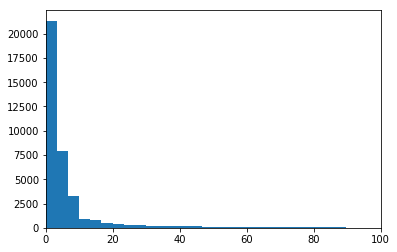

In [183]:
plt.hist(pred, bins = 1000)
plt.xlim([0,100])
plt.show()

In [184]:
importance_rf1 = pd.DataFrame({"importance" : rf1.feature_importances_, "variable" : list(X_train.columns)})
importance_rf1.sort_values("importance", ascending=False)

,importance,variable
12,0.410006,last_months_mean_15
33,0.155441,last_months_median_12_modif
14,0.062462,last_months_median_15
9,0.056044,last_months_mean_12
26,0.049362,last_month_12
17,0.043327,last_month_3
3,0.035563,last_months_mean_6
5,0.035513,last_months_median_6
31,0.031485,last_months_median_6_modif
13,0.011032,last_months_std_15


### Optimize the mae

MAE optimization with Scikit learn RF is very slow : 

In [186]:
rf2 = RandomForestRegressor(n_estimators = 50,
                            min_samples_leaf=10, 
                            verbose=1,
                            oob_score=True,
                            n_jobs=7,
                            criterion = "mae")

In [187]:
# the following takes about 40 min. on 7 cores machine
start_time = time.time()
rf2.fit(X=X_train, y=y_train)
time_exec = time.time() - start_time
print("--- %s seconds ---" % (time_exec))

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed: 28.6min
[Parallel(n_jobs=7)]: Done  50 out of  50 | elapsed: 38.2min finished


--- 2289.517694234848 seconds ---


In [188]:
pred_train_rf2 = rf2.predict(X_train)
pred_rf2 = rf2.predict(X_test_local)

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done  50 out of  50 | elapsed:    0.1s finished


In [189]:
importance_rf2 = pd.DataFrame({"importance" : rf2.feature_importances_, "variable" : list(X_train.columns)})
importance_rf2.sort_values("importance", ascending=False)

,importance,variable
33,0.381186,last_months_median_12_modif
5,0.138694,last_months_median_6
12,0.079800,last_months_mean_15
9,0.058886,last_months_mean_12
14,0.046788,last_months_median_15
3,0.041065,last_months_mean_6
31,0.035775,last_months_median_6_modif
0,0.025319,last_months_mean_3
7,0.020597,last_months_std_9
6,0.017552,last_months_mean_9


## MAE performances

Random forest (MSE) scores :

In [185]:
print(abs(y_train - pred_train).mean())
print(abs(y_train - rf1.oob_prediction_).mean())
print(abs(y_test_local - pred).mean())

6.67223178301
8.67162899318
11.2511384812


Random forest (MAE) scores :

In [190]:
print(abs(y_train - pred_train_rf2).mean())
print(abs(y_train - rf2.oob_prediction_).mean())
print(abs(y_test_local - pred_rf2).mean())

6.45025312856
8.05033856607
10.2540412659


Logically, RF trained for MAE gives better accuracy than the MSE random forest. 

But we can see bellow that taking the median of the demand over the last months outperforms the score obtained with random forest !!!

Scores of the means :

In [38]:
print(abs(y_test_local - X_test_local.last_months_mean_3.values).mean())
print(abs(y_test_local - X_test_local.last_months_mean_6.values).mean())
print(abs(y_test_local - X_test_local.last_months_mean_9.values).mean())
print(abs(y_test_local - X_test_local.last_months_mean_12.values).mean())
print(abs(y_test_local - X_test_local.last_months_mean_15.values).mean())

10.8523976971
10.8390948737
10.5578423599
10.4464051781
10.5648929569


Scores of the medians :

In [39]:
print(abs(y_test_local - X_test_local.last_months_median_3.values).mean())
print(abs(y_test_local - X_test_local.last_months_median_3_modif.values).mean())

print(abs(y_test_local - X_test_local.last_months_median_6.values).mean())
print(abs(y_test_local - X_test_local.last_months_median_6_modif.values).mean())

print(abs(y_test_local - X_test_local.last_months_median_9.values).mean())
print(abs(y_test_local - X_test_local.last_months_median_9_modif.values).mean())

print(abs(y_test_local - X_test_local.last_months_median_12.values).mean())
print(abs(y_test_local - X_test_local.last_months_median_12_modif.values).mean())

print(abs(y_test_local - X_test_local.last_months_median_15.values).mean())
print(abs(y_test_local - X_test_local.last_months_median_15_modif.values).mean())


10.6611335195
10.7576016134
9.89868393836
9.99661288654
10.1519288448
10.1221170752
9.93618781673
9.9043722205
9.93088737201
9.89291808874


The median is better !

What we call `median_i_mofif` is a slight modification of the median over the last `i` months : in fact, if a couple SalOrg - Material has less than `i` months of history (we consider that the history of a couple SalOrg-Meterial begins when the demand takes a non zero value for the first time), we take the median over the available history.

We see that this modification leads to better mae for `nb_last_month` = 9, 12, 15

## Optimize the number of last months for the median

The following graphic represents the performances of the median estimator for each month from april 2016 to march 2017. 

For each month, we have tested different values for `nb_last_month`: the number of last months over which we take the median.

In [89]:
nb_last_month = list(range(3,18))
scores = list()
for j in range(12):
    print(str(j) + " ")
    X = make_feature(data= df3[list(range(0,62 - j))], nb_last_month=nb_last_month)
    y = df3[62 - j].values
    mae_by_nb_last_month = list()
    for i in nb_last_month:
        mae_by_nb_last_month.append(abs(y - X["last_months_median_" + str(i) + "_modif"].values).mean())
    scores.append(mae_by_nb_last_month)
scores = pd.DataFrame(scores)
scores.columns = nb_last_month
scores["month"] = ["march", "february", "january", "december", "november", "october",
                   "september", "august", "july", "june", "may", "april"]

0 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 


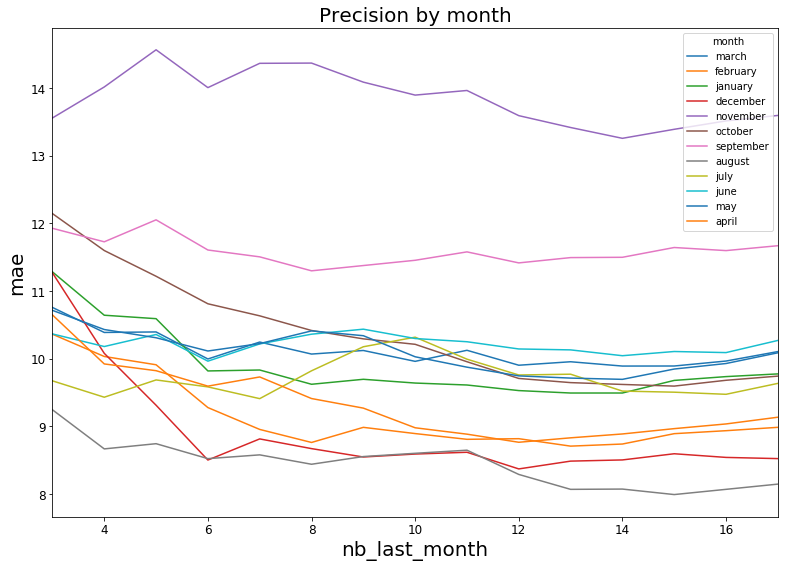

In [105]:
figure, ax = plt.subplots()

scores.set_index("month").transpose().plot(ax = ax, figsize = (13,9))

ax.set_title(label="Precision by month", fontdict={"size":20})
ax.set_ylabel(ylabel='mae', fontdict={"size":20})
ax.set_xlabel(xlabel='nb_last_month', fontdict={"size":20})

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


Below, the same graphic as before but for april 2016 only :

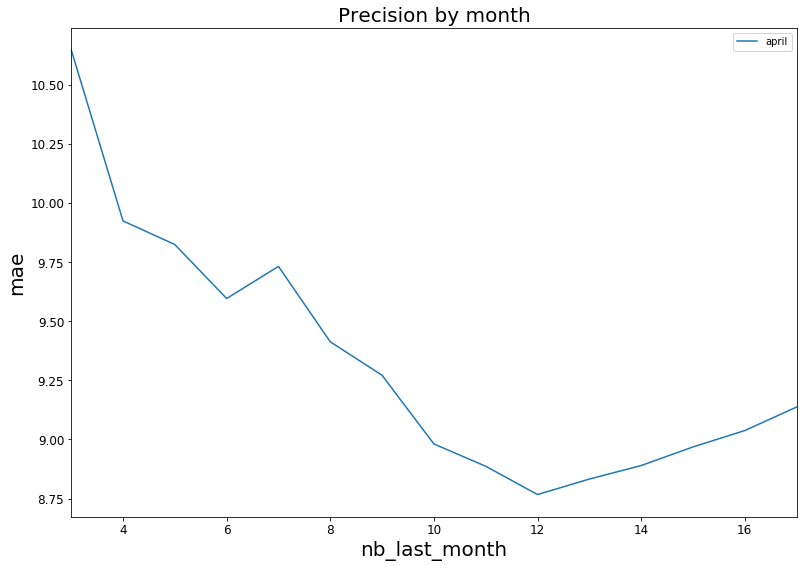

In [157]:
figure, ax = plt.subplots()

scores.set_index("month").transpose().plot(y = "april",ax = ax, figsize = (13,9))

ax.set_title(label="Precision by month", fontdict={"size":20})
ax.set_ylabel(ylabel='mae', fontdict={"size":20})
ax.set_xlabel(xlabel='nb_last_month', fontdict={"size":20})

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


# Assessment of the seasonality and optimization of the model

## Compute the ratios

To take into account the trend and the seasonality, we computed ratios.

The picture bellow gives an example for the month of november. The formula we used to compute the ratio is :


$$ ratio\_means = \frac{nov_{2016} + nov_{2015} + nov_{2014} + nov_{2013}}{mean(nov_{2015}:oct_{2016}) + mean(nov_{2014}:oct_{2015}) + mean(nov_{2013}:oct_{2014}) + mean(nov_{2012}:oct_{2013})}$$

$$ ratio\_medians = \frac{nov_{2016} + nov_{2015} + nov_{2014} + nov_{2013}}{median(nov_{2015}:oct_{2016}) + median(nov_{2014}:oct_{2015}) + median(nov_{2013}:oct_{2014}) + median(nov_{2012}:oct_{2013})}$$


</br></br>

<img src="../yohann/image/image_pres.pdf",width=750, height=550>

We have applied this idea of ratio not on the aggregated serie but on the five series which correspond to each product lines (`PL`  variable) :

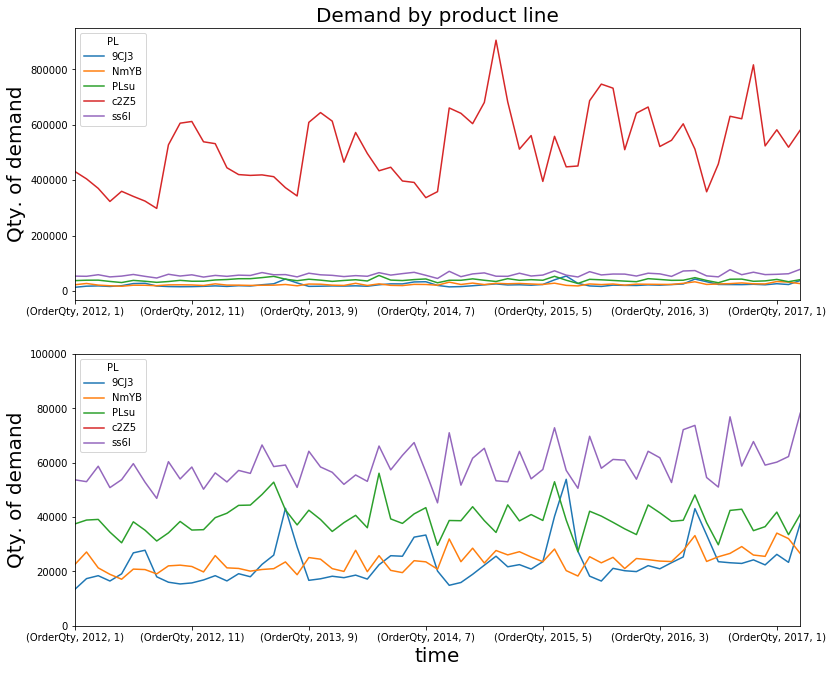

In [154]:
x_vars_group = ["PL"]

figure, (ax0, ax1) = plt.subplots(ncols=1, nrows=2)

df[(x_vars_group + ['year', 'month', 'OrderQty'])].groupby((x_vars_group + ['year', 'month'])).sum().\
reset_index().pivot_table(index=x_vars_group, columns=["year", "month"]).fillna(0).transpose()\
.plot(ax = ax0, figsize = (13,11))

df[(x_vars_group + ['year', 'month', 'OrderQty'])].groupby((x_vars_group + ['year', 'month'])).sum().\
reset_index().pivot_table(index=x_vars_group, columns=["year", "month"]).fillna(0).transpose()\
.plot(ax = ax1, figsize = (13,11))


ax0.set_title(label="Demand by product line", fontdict={"size":20})
ax0.set_ylabel(ylabel='Qty. of demand', fontdict={"size":20})
ax0.set_xlabel(xlabel='')

ax1.set_title(label="", fontdict={"size":20})
ax1.set_ylabel(ylabel='Qty. of demand', fontdict={"size":20})
ax1.set_xlabel(xlabel='time', fontdict={"size":20})


ax1.set_ylim(bottom=0, top=100000)


In [155]:
def make_ratio_one(data, nb_last_month):
    
    list_ratio_means = list()
    list_ratio_medians = list()
    
    for i in nb_last_month :
        
        nb_year_ratio = (data.shape[1] -1 - i) // 12
        y_months = data.iloc[:, [(data.shape[1] - 1 - 12 * j) for j in range((nb_year_ratio + 1) )]]
        medians = [data.iloc[:, (data.shape[1] -1 - 12 * j - i):(data.shape[1] - 1 - 12*j)].median(axis = 1) for j in range((nb_year_ratio + 1))]
        tab_medians = pd.DataFrame(medians).transpose()
        ratio_medians = y_months.sum(axis=1)/ tab_medians.sum(axis=1)

        means = [data.iloc[:, (data.shape[1] -1 - 12 * j - i):(data.shape[1] - 1 - 12*j)].mean(axis = 1) for j in range((nb_year_ratio + 1))]
        tab_means = pd.DataFrame(means).transpose()
        ratio_means = y_months.sum(axis=1)/ tab_means.sum(axis=1)
        
        list_ratio_means.append(ratio_means)
        list_ratio_medians.append(ratio_medians)
        
    data_ratio_means = pd.DataFrame(list_ratio_means).transpose()
    data_ratio_medians = pd.DataFrame(list_ratio_medians).transpose()
        
    data_ratio_means.columns = nb_last_month
    data_ratio_medians.columns = nb_last_month
        
    return data_ratio_means, data_ratio_medians

## vérifier que les nombres de mois correspondent bien

In [156]:
def make_ratio(df, nb_last_month, x_vars_group):
    
    data2 = df[(x_vars_group + ['year', 'month', 'OrderQty'])].groupby((x_vars_group + ['year', 'month'])).sum().reset_index()
    data3 = data2.pivot_table(index=x_vars_group, columns=["year", "month"]).fillna(0)

    list_data_ratio_means = list()
    list_data_ratio_medians = list()
    
    for i in range(12):
        n_mois = 3 - i + ((3-i) <=0) * 12
        data_ratio_means, data_ratio_medians =  make_ratio_one(data = data3.iloc[:,:(data3.shape[1]-i)],
                                                               nb_last_month=nb_last_month)
        
        data_ratio_means.columns = ["r_means_m" + str(n_mois) + "_" + str(j) for j in data_ratio_means.columns]
        data_ratio_medians.columns = ["r_medians_m" + str(n_mois) + "_" + str(j) for j in data_ratio_medians.columns]
        
        list_data_ratio_means.append(data_ratio_means)
        list_data_ratio_medians.append(data_ratio_medians)
    
    return pd.concat(list_data_ratio_means + list_data_ratio_medians, axis=1)

The data below contains all the ratios which corresponds to different `PL`, different months and different `nb_last_month` (for the computation of the mean and the median).

In [63]:
data_ratio_PL = make_ratio(df=df, nb_last_month=[3,6,9,12,15], x_vars_group=["PL"])

In [64]:
data_ratio_PL.head()

,r_means_m3_3,r_means_m3_6,r_means_m3_9,r_means_m3_12,r_means_m3_15,r_means_m2_3,r_means_m2_6,r_means_m2_9,r_means_m2_12,r_means_m2_15,r_means_m1_3,r_means_m1_6,r_means_m1_9,r_means_m1_12,r_means_m1_15,r_means_m12_3,r_means_m12_6,r_means_m12_9,r_means_m12_12,r_means_m12_15,r_means_m11_3,r_means_m11_6,r_means_m11_9,r_means_m11_12,r_means_m11_15,r_means_m10_3,r_means_m10_6,r_means_m10_9,r_means_m10_12,r_means_m10_15,r_means_m9_3,r_means_m9_6,r_means_m9_9,r_means_m9_12,r_means_m9_15,r_means_m8_3,r_means_m8_6,r_means_m8_9,r_means_m8_12,r_means_m8_15,r_means_m7_3,r_means_m7_6,r_means_m7_9,r_means_m7_12,r_means_m7_15,r_means_m6_3,r_means_m6_6,r_means_m6_9,r_means_m6_12,r_means_m6_15,r_means_m5_3,r_means_m5_6,r_means_m5_9,r_means_m5_12,r_means_m5_15,r_means_m4_3,r_means_m4_6,r_means_m4_9,r_means_m4_12,r_means_m4_15,r_medians_m3_3,r_medians_m3_6,r_medians_m3_9,r_medians_m3_12,r_medians_m3_15,r_medians_m2_3,r_medians_m2_6,r_medians_m2_9,r_medians_m2_12,r_medians_m2_15,r_medians_m1_3,r_medians_m1_6,r_medians_m1_9,r_medians_m1_12,r_medians_m1_15,r_medians_m12_3,r_medians_m12_6,r_medians_m12_9,r_medians_m12_12,r_medians_m12_15,r_medians_m11_3,r_medians_m11_6,r_medians_m11_9,r_medians_m11_12,r_medians_m11_15,r_medians_m10_3,r_medians_m10_6,r_medians_m10_9,r_medians_m10_12,r_medians_m10_15,r_medians_m9_3,r_medians_m9_6,r_medians_m9_9,r_medians_m9_12,r_medians_m9_15,r_medians_m8_3,r_medians_m8_6,r_medians_m8_9,r_medians_m8_12,r_medians_m8_15,r_medians_m7_3,r_medians_m7_6,r_medians_m7_9,r_medians_m7_12,r_medians_m7_15,r_medians_m6_3,r_medians_m6_6,r_medians_m6_9,r_medians_m6_12,r_medians_m6_15,r_medians_m5_3,r_medians_m5_6,r_medians_m5_9,r_medians_m5_12,r_medians_m5_15,r_medians_m4_3,r_medians_m4_6,r_medians_m4_9,r_medians_m4_12,r_medians_m4_15
PL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9CJ3,1.190636,1.259514,1.038895,1.061638,1.110599,0.986575,1.005309,0.841624,0.876222,0.911237,1.142782,0.954038,0.912345,0.954782,0.995235,1.083856,0.791829,0.830724,0.868848,0.920671,0.998900,0.764236,0.823402,0.874302,0.911422,0.661827,0.669895,0.731617,0.774313,0.754265,0.558551,0.666090,0.720134,0.784116,0.732287,0.743777,0.909703,1.015888,1.079935,1.009800,1.476886,1.681982,1.870769,1.776199,1.749761,1.562358,1.678812,1.793321,1.561417,1.582496,1.151325,1.202715,1.230791,1.073999,1.102226,1.063663,1.142985,1.014019,0.978625,1.007117,1.221931,1.259558,1.209092,1.187751,1.214500,0.989992,1.035208,0.966742,0.976307,1.013086,1.138942,1.110678,1.066465,1.067861,1.108146,1.100290,0.931195,0.941348,0.990143,1.016251,1.083951,0.850024,0.933244,0.993515,1.015258,0.744793,0.742798,0.826885,0.878328,0.867970,0.549677,0.750782,0.826530,0.894917,0.843819,0.742783,1.049071,1.171193,1.218196,1.154483,1.646808,1.801078,2.045726,1.993482,1.925323,1.549846,1.715952,1.825350,1.726678,1.735670,1.142722,1.229854,1.262104,1.180909,1.203567,1.066292,1.137846,1.130451,1.108225,1.101809
NmYB,1.000852,0.996757,1.027447,1.047174,1.064451,0.996903,1.018851,1.034651,1.043565,1.057658,1.185076,1.201328,1.207936,1.192044,1.198118,0.872703,0.915415,0.935021,0.934667,0.930299,1.032525,1.045242,1.050681,1.054143,1.062860,1.066279,1.067738,1.045578,1.056262,1.067952,1.152637,1.161161,1.167055,1.152446,1.173027,0.883871,0.885311,0.877397,0.884991,0.897303,0.973140,0.942490,0.955428,0.969153,0.984460,1.135029,1.138637,1.119534,1.145667,1.160162,0.940919,0.970808,0.979761,0.995037,0.995961,0.886717,0.941926,0.959165,0.976618,0.963290,1.006178,1.004398,1.062320,1.067047,1.090155,1.019663,1.025566,1.069559,1.062305,1.075518,1.212246,1.219151,1.220680,1.204000,1.203549,0.862855,0.929082,0.938625,0.944779,0.940347,1.022368,1.047013,1.055334,1.074328,1.062031,1.082042,1.082194,1.060966,1.074956,1.065279,1.182329,1.171217,1.192531,1.163922,1.207737,0.879152,0.901813,0.900131,0.893356,0.927690,0.988093,0.966684,0.983126,0.977446,1.009338,1.165763,1.170768,1.146825,1.172962,1.180110,0.964167,0.987737,0.992218,1.012958,1.

Here is a graphical representation of the ratio for  `nb_last_month` = 12 :

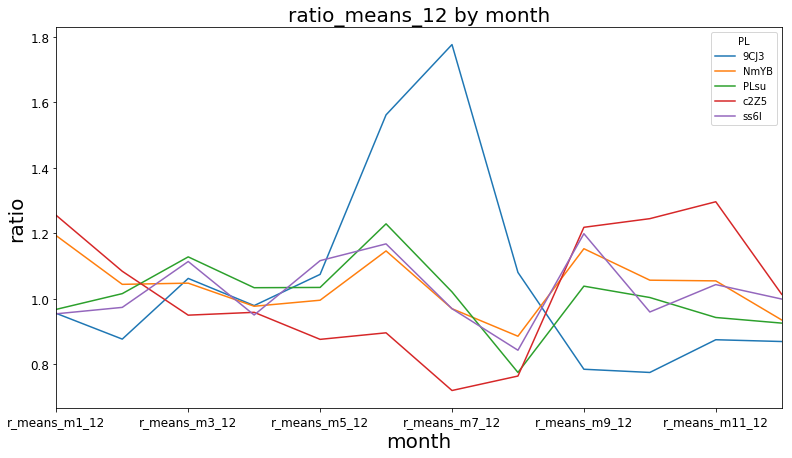

In [158]:
figure, ax = plt.subplots()

data_ratio_PL[[("r_means_m" + str(j) + "_12") for j in range(1,13)]].transpose().plot(ax = ax,
                                                                                      figsize = (13,7))

ax.set_title(label="ratio_means_12 by month", fontdict={"size":20})
ax.set_ylabel(ylabel='ratio', fontdict={"size":20})
ax.set_xlabel(xlabel='month', fontdict={"size":20})

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


In [233]:
data_PL = pd.merge(left = df[['SalOrg','Material','PL']].groupby(['SalOrg','Material','PL']).count().reset_index(), 
                   right= data_ratio_PL.reset_index(),
                   on="PL",
                   how="inner")

In [243]:
data_PL.head()

,SalOrg,Material,PL,r_means_m3_3,r_means_m3_6,r_means_m3_9,r_means_m3_12,r_means_m3_15,r_means_m2_3,r_means_m2_6,r_means_m2_9,r_means_m2_12,r_means_m2_15,r_means_m1_3,r_means_m1_6,r_means_m1_9,r_means_m1_12,r_means_m1_15,r_means_m12_3,r_means_m12_6,r_means_m12_9,r_means_m12_12,r_means_m12_15,r_means_m11_3,r_means_m11_6,r_means_m11_9,r_means_m11_12,r_means_m11_15,r_means_m10_3,r_means_m10_6,r_means_m10_9,r_means_m10_12,r_means_m10_15,r_means_m9_3,r_means_m9_6,r_means_m9_9,r_means_m9_12,r_means_m9_15,r_means_m8_3,r_means_m8_6,r_means_m8_9,r_means_m8_12,r_means_m8_15,r_means_m7_3,r_means_m7_6,r_means_m7_9,r_means_m7_12,r_means_m7_15,r_means_m6_3,r_means_m6_6,r_means_m6_9,r_means_m6_12,r_means_m6_15,r_means_m5_3,r_means_m5_6,r_means_m5_9,r_means_m5_12,r_means_m5_15,r_means_m4_3,r_means_m4_6,r_means_m4_9,r_means_m4_12,r_means_m4_15,r_medians_m3_3,r_medians_m3_6,r_medians_m3_9,r_medians_m3_12,r_medians_m3_15,r_medians_m2_3,r_medians_m2_6,r_medians_m2_9,r_medians_m2_12,r_medians_m2_15,r_medians_m1_3,r_medians_m1_6,r_medians_m1_9,r_medians_m1_12,r_medians_m1_15,r_medians_m12_3,r_medians_m12_6,r_medians_m12_9,r_medians_m12_12,r_medians_m12_15,r_medians_m11_3,r_medians_m11_6,r_medians_m11_9,r_medians_m11_12,r_medians_m11_15,r_medians_m10_3,r_medians_m10_6,r_medians_m10_9,r_medians_m10_12,r_medians_m10_15,r_medians_m9_3,r_medians_m9_6,r_medians_m9_9,r_medians_m9_12,r_medians_m9_15,r_medians_m8_3,r_medians_m8_6,r_medians_m8_9,r_medians_m8_12,r_medians_m8_15,r_medians_m7_3,r_medians_m7_6,r_medians_m7_9,r_medians_m7_12,r_medians_m7_15,r_medians_m6_3,r_medians_m6_6,r_medians_m6_9,r_medians_m6_12,r_medians_m6_15,r_medians_m5_3,r_medians_m5_6,r_medians_m5_9,r_medians_m5_12,r_medians_m5_15,r_medians_m4_3,r_medians_m4_6,r_medians_m4_9,r_medians_m4_12,r_medians_m4_15
0,97LK,00IYcj,ss6l,1.152616,1.1033,1.117241,1.113352,1.143638,0.981823,0.98443,0.964093,0.973166,0.982537,0.958464,0.962248,0.945838,0.953566,0.942198,0.929288,0.966463,0.966899,0.99859,0.995241,1.056154,1.022358,1.038247,1.042805,1.051607,0.971751,0.945184,0.957552,0.959092,0.965888,1.19772,1.174086,1.209604,1.198373,1.207852,0.793393,0.824515,0.832999,0.842223,0.837416,0.918036,0.948546,0.960319,0.969127,0.965493,1.117739,1.168827,1.15474,1.167212,1.165733,1.096601,1.127198,1.131525,1.115938,1.122193,0.948839,0.957486,0.959929,0.949884,0.954954,1.167296,1.125724,1.136268,1.126709,1.16657,0.969359,0.992323,0.976927,0.988091,1.002755,0.955754,0.968365,0.959932,0.968751,0.958162,0.935563,0.969573,0.978853,1.019298,1.0159,1.087619,1.033585,1.057537,1.059975,1.064181,1.002173,0.959078,0.977933,0.977544,0.97909,1.223432,1.193551,1.22032,1.214329,1.216249,0.801511,0.838912,0.850837,0.85218,0.848403,0.91987,0.968888,0.979002,0.979638,0.97643,1.134052,1.186338,1.173211,1.173974,1.175503,1.10728,1.120384,1.137719,1.118292,1.143023,0.965859,0.958786,0.965816,0.956268,0.97634
1,97LK,00W03x,ss6l,1.152616,1.1033,1.117241,1.113352,1.143638,0.981823,0.98443,0.964093,0.973166,0.982537,0.958464,0.962248,0.945838,0.953566,0.942198,0.929288,0.966463,0.966899,0.99859,0.995241,1.056154,1.022358,1.038247,1.042805,1.051607,0.971751,0.945184,0.957552,0.959092,0.965888,1.19772,1.174086,1.209604,1.198373,1.207852,0.793393,0.824515,0.832999,0.842223,0.837416,0.918036,0.948546,0.960319,0.969127,0.965493,1.117739,1.168827,1.15474,1.167212,1.165733,1.096601,1.127198,1.131525,1.115938,1.122193,0.948839,0.957486,0.959929,0.949884,0.954954,1.167296,1.125724,1.136268,1.126709,1.16657,0.969359,0.992323,0.976927,0.988091,1.002755,0.955754,0.968365,0.959932,0.968751,0.958162,0.935563,0.969573,0.978853,1.019298,1.0159,1.087619,1.033585,1.057537,1.059975,1.064181,1.002173,0.959078,0.977933,0.977544,0.97909,1.223432,1.193551,1.22032,1.214329,1.216249,0.801511,0.838912,0.850837,0.85218,0.848403,0.91987,0.968888,0.979002,0.979638,0.97643,1.134052,1.186338,1.173211,1.173974,1.175503,1.10728,1.120384,1.137719,1.118292,1.143023,0.965859,0.958786,0.965816,0.956268,0.97634
2,97LK,00mt9e,ss6l,1.152616,1.1033,1.117241,1.113352,1.1

## Results for march 2017

Use the ratio computed based on median :

In [239]:
print(abs(y_test_local - X_test_local.last_months_median_6.values * data_PL.r_medians_m3_6).mean())
print(abs(y_test_local - X_test_local.last_months_median_6_modif.values * data_PL.r_medians_m3_6).mean())

print(abs(y_test_local - X_test_local.last_months_median_12.values * data_PL.r_medians_m3_12).mean())
print(abs(y_test_local - X_test_local.last_months_median_12_modif.values * data_PL.r_medians_m3_12).mean())

print(abs(y_test_local - X_test_local.last_months_median_15.values * data_PL.r_medians_m3_15).mean())
print(abs(y_test_local - X_test_local.last_months_median_15_modif.values * data_PL.r_medians_m3_15).mean())



10.0610999845
10.1902401994
9.91176130915
9.90759028518
9.97601968954
9.96943102545


Use the ratio computed based on mean :

In [240]:
print(abs(y_test_local - X_test_local.last_months_median_6.values * data_PL.r_means_m3_6).mean())
print(abs(y_test_local - X_test_local.last_months_median_6_modif.values * data_PL.r_means_m3_6).mean())

print(abs(y_test_local - X_test_local.last_months_median_12.values * data_PL.r_means_m3_12).mean())
print(abs(y_test_local - X_test_local.last_months_median_12_modif.values * data_PL.r_means_m3_12).mean())

print(abs(y_test_local - X_test_local.last_months_median_15.values * data_PL.r_means_m3_15).mean())
print(abs(y_test_local - X_test_local.last_months_median_15_modif.values * data_PL.r_means_m3_15).mean())


10.0454269681
10.1719922678
9.80171613793
9.78704069124
9.86158783612
9.84503398547


In the above results, we see that for the month of march 2017, the ratio adjustment allows to improve the MAE if we consider the ratios computed based on the means.

## Generalization for the other months ?

Unfortunately, we see below that technic based on ratio doesn't always improve the score (for months different than march 2017) :

In [162]:
nb_last_month = list(range(3,18))
months_num = [3,2,1,12,11,10,9,8,7,6,5,4]
data_ratio_PL2 = make_ratio(df=df, nb_last_month=nb_last_month, x_vars_group=["PL"])
data_PL2 = pd.merge(left = df[['SalOrg','Material','PL']].groupby(['SalOrg','Material','PL']).count().reset_index(), 
                   right= data_ratio_PL2.reset_index(),
                   on="PL",
                   how="inner")
scores_median_modif = list()
scores_median_modif_ratio_means_PL = list()
scores_median_modif_ratio_medians_PL = list()

for j in range(12) :
    print(str(j))
    month_num = months_num[j]
    X = make_feature(data= df3[list(range(0,62 - j))], nb_last_month=nb_last_month)
    y = df3[62 - j].values
    mae_median_modif = list()
    mae_median_modif_ratio_means_PL = list()
    mae_median_modif_ratio_medians_PL = list()
    
    for i in nb_last_month:
        mae_median_modif.append(abs(y - X["last_months_median_" + str(i) + "_modif"].values).mean())
        mae_median_modif_ratio_means_PL.append(abs(y - X["last_months_median_" + str(i) + "_modif"].values * \
                                             data_PL2["r_means_m" + str(month_num) + "_" + str(i)].values).mean())
        mae_median_modif_ratio_medians_PL.append(abs(y - X["last_months_median_" + str(i) + "_modif"].values * \
                                             data_PL2["r_medians_m" + str(month_num) + "_" + str(i)].values).mean())
    scores_median_modif.append(mae_median_modif)
    scores_median_modif_ratio_means_PL.append(mae_median_modif_ratio_means_PL)
    scores_median_modif_ratio_medians_PL.append(mae_median_modif_ratio_medians_PL)
    


0
1
2
3
4
5
6
7
8
9
10
11


In [163]:
scores_median_modif2 = pd.DataFrame(scores_median_modif)
scores_median_modif2.columns = nb_last_month
scores_median_modif2["month"] = ["march", "february", "january", "december", "november", "october",
                   "september", "august", "july", "june", "may", "april"]

In [164]:
scores_median_modif_ratio_means_PL2 = pd.DataFrame(scores_median_modif_ratio_means_PL)
scores_median_modif_ratio_means_PL2.columns = nb_last_month
scores_median_modif_ratio_means_PL2["month"] = ["march", "february", "january", "december", "november", "october",
                   "september", "august", "july", "june", "may", "april"]

In [165]:
scores_median_modif_ratio_medians_PL2 = pd.DataFrame(scores_median_modif_ratio_medians_PL)
scores_median_modif_ratio_medians_PL2.columns = nb_last_month
scores_median_modif_ratio_medians_PL2["month"] = ["march", "february", "january", "december", "november", "october",
                   "september", "august", "july", "june", "may", "april"]

Plot for march 2017 :

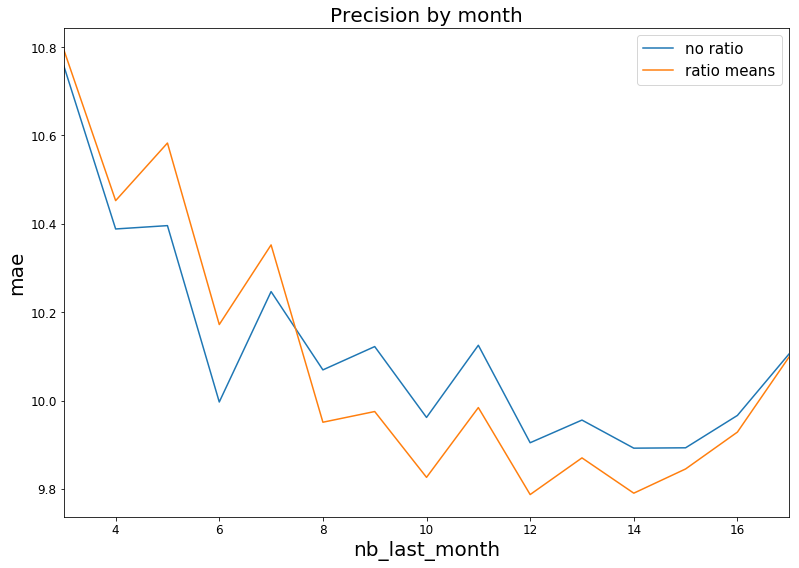

In [193]:
figure, ax = plt.subplots()

scores_median_modif2.set_index("month").transpose().plot(y = "march", ax = ax, figsize = (13,9))
scores_median_modif_ratio_means_PL2.set_index("month").transpose().plot(y = "march", ax = ax, figsize = (13,9))
#scores_median_modif_ratio_medians_PL2.set_index("month").transpose().plot(y = "july", ax = ax, figsize = (13,9))

ax.set_title(label="Precision by month", fontdict={"size":20})
ax.set_ylabel(ylabel='mae', fontdict={"size":20})
ax.set_xlabel(xlabel='nb_last_month', fontdict={"size":20})
ax.legend(labels = ["no ratio", "ratio means"], fontsize = 15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


Plot for may 2016 :

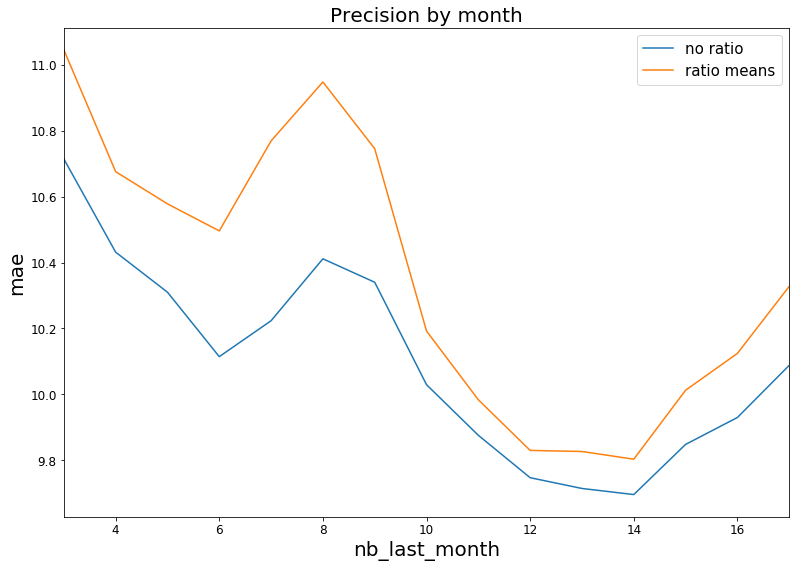

In [194]:
figure, ax = plt.subplots()

scores_median_modif2.set_index("month").transpose().plot(y = "may", ax = ax, figsize = (13,9))
scores_median_modif_ratio_means_PL2.set_index("month").transpose().plot(y = "may", ax = ax, figsize = (13,9))
#scores_median_modif_ratio_medians_PL2.set_index("month").transpose().plot(y = "july", ax = ax, figsize = (13,9))

ax.set_title(label="Precision by month", fontdict={"size":20})
ax.set_ylabel(ylabel='mae', fontdict={"size":20})
ax.set_xlabel(xlabel='nb_last_month', fontdict={"size":20})
ax.legend(labels = ["no ratio", "ratio means"], fontsize = 15)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)


The conclusion is that apparently the method of ratio on the product line doesn't significatively improve the MAE.

The idear fo ratio can be applied to other variables than PL

# Final submission

Our submission which scores the best is a mean of 2 other submissions :
* median over the last 12 months with modification based on history available (see 2.3)
* two other models where we used the method of the ratio :
  * one where the ratios are computed based on PL
  * one where the ratios are computed based on PL + [low, mid, high] where low/mid/high indicates the order of magnitude of the median : low [0;1[, mid [1,10[, and high [10+]

